# Import libraries

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import cufflinks as cf
import warnings

cf.set_config_file(offline=True)
warnings.filterwarnings('ignore')

# Yahoo Finance examples

In [15]:
# Number of period
df1 = yf.download('^GSPC', period='5d', progress=False)

# Start and end dates
df2 = yf.download('^GSPC', start='2020-12-24', end='2020-12-31', progress=False)

# Year to date (YTD)
df3 = yf.download('^GSPC', period='ytd', progress=False)

# Multiple stocks at once (just Adj Close)
faang_stocks = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX']
df4 = yf.download(faang_stocks, period='ytd', progress=False)['Adj Close']

In [16]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,3850.528027,3882.633936,3825.684082,3867.110010,3867.110010,2.990105e+09
std,39.103578,34.478495,51.959845,32.265138,32.265138,1.389086e+09
min,3792.610107,3832.189941,3742.060059,3831.389893,3831.389893,7.271762e+08
25%,3831.979980,3870.909912,3809.370117,3845.080078,3845.080078,2.844620e+09
50%,3858.850098,3880.939941,3848.800049,3857.080078,3857.080078,3.337710e+09
75%,3880.939941,3910.629883,3858.850098,3899.379883,3899.379883,3.613120e+09
max,3888.260010,3918.500000,3869.340088,3902.620117,3902.620117,4.427900e+09


In [17]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00
mean,3725.815002,3736.270020,3716.467529,3724.375061,3724.375061,2.986195e+09
std,23.882199,22.619244,18.400414,14.615683,14.615683,7.508554e+08
min,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1.885090e+09
25%,3715.780029,3731.337524,3714.602539,3721.045044,3721.045044,2.830172e+09
50%,3729.609985,3742.569946,3723.170044,3729.540039,3729.540039,3.266115e+09
75%,3739.644958,3747.502441,3725.035034,3732.870056,3732.870056,3.422138e+09
max,3750.010010,3756.120117,3730.209961,3735.360107,3735.360107,3.527460e+09


In [18]:
df3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,4269.525922,4305.439062,4223.502691,4265.164001,4265.164001,3.971972e+09
std,283.512608,278.626216,284.226274,281.683487,281.683487,7.419848e+08
min,3665.899902,3707.709961,3636.870117,3666.770020,3666.770020,7.271909e+08
25%,4058.357483,4083.632507,3992.742554,4032.377441,4032.377441,3.563778e+09
50%,4329.875000,4370.285156,4267.364990,4316.384766,4316.384766,3.903935e+09
75%,4482.097534,4520.537598,4451.199951,4482.334961,4482.334961,4.218170e+09
max,4804.509766,4818.620117,4774.270020,4796.560059,4796.560059,6.954110e+09


In [19]:
df4.describe()

,AAPL,AMZN,FB,GOOG,NFLX
count,130.000000,130.000000,129.000000,130.000000,130.000000
mean,158.855455,138.615412,219.358528,2530.753966,312.791921
std,13.403626,21.583058,49.718734,232.298386,120.286162
min,130.059998,102.309998,155.850006,2116.790039,166.369995
25%,147.057495,115.411375,190.289993,2301.374939,189.172501
50%,162.233315,145.175751,206.160004,2583.609985,349.434998
75%,170.102570,157.539371,223.589996,2729.502563,389.309998
max,181.511703,170.404495,338.540009,2960.729980,597.369995


In [24]:
# Multiple fields using list comprehension
faang_stocks = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX']
ohlcv= {symbol: yf.download(symbol, period='250d', progress=False) for symbol in faang_stocks}

print("keys are: ", list(ohlcv.keys()))

keys are:  ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX']


In [25]:
# Display AMZN key stock data
ohlcv['AMZN']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-14,185.442505,185.882996,183.041504,184.084000,184.084000,65932000
2021-07-15,184.710007,184.770004,181.046005,181.559998,181.559998,63706000
2021-07-16,181.665497,182.302994,178.522995,178.681503,178.681503,80874000
2021-07-19,176.628998,177.510498,174.957993,177.479507,177.479507,75692000
2021-07-20,178.365997,179.600006,175.899994,178.659500,178.659500,65114000
...,...,...,...,...,...,...
2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700
2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
2022-07-07,113.849998,116.989998,113.489998,116.330002,116.330002,57872300


In [26]:
# Display AMZN adjusted close data
ohlcv['AMZN']['Adj Close']

Date
2021-07-14    184.084000
2021-07-15    181.559998
2021-07-16    178.681503
2021-07-19    177.479507
2021-07-20    178.659500
                 ...    
2022-07-05    113.500000
2022-07-06    114.330002
2022-07-07    116.330002
2022-07-08    115.540001
2022-07-11    112.570000
Name: Adj Close, Length: 250, dtype: float64

In [27]:
# Retrieve intraday data for last five days
df6 = yf.download(tickers='^GSPC', period='5d', interval='1m', progress=False)

# Display last five rows of the dataframe
df6.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-11 12:06:00-04:00,3856.129883,3857.739990,3856.129883,3857.729980,3857.729980,2263863
2022-07-11 12:07:00-04:00,3857.719971,3858.010010,3855.419922,3855.530029,3855.530029,2859440
2022-07-11 12:08:00-04:00,3855.550049,3856.610107,3855.370117,3856.530029,3856.530029,2371859
2022-07-11 12:09:00-04:00,3856.540039,3858.320068,3856.540039,3858.189941,3858.189941,3766419
2022-07-11 12:10:30-04:00,3859.419922,3859.419922,3859.419922,3859.419922,3859.419922,0


In [34]:
# Get SPY option chain
spy = yf.Ticker('SPY')
options = spy.option_chain('2022-07-11')
options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY220711P00290000,2022-07-11 14:09:10+00:00,290.0,0.01,0.00,0.01,0.0,0.0,1.0,2567,1.687502,False,REGULAR,USD
1,SPY220711P00295000,2022-07-07 14:39:05+00:00,295.0,0.01,0.00,0.01,0.0,0.0,500.0,1207,1.562502,False,REGULAR,USD
2,SPY220711P00300000,2022-07-06 16:45:39+00:00,300.0,0.01,0.00,0.01,0.0,0.0,9.0,2173,1.500002,False,REGULAR,USD
3,SPY220711P00305000,2022-07-11 14:49:54+00:00,305.0,0.01,0.00,0.01,0.0,0.0,11.0,1500,1.375003,False,REGULAR,USD
4,SPY220711P00310000,2022-07-11 13:46:18+00:00,310.0,0.01,0.00,0.01,0.0,0.0,4.0,668,1.312503,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,SPY220711P00440000,2022-06-07 14:21:01+00:00,440.0,32.72,51.86,52.28,0.0,0.0,NaN,46,0.000010,True,REGULAR,USD
114,SPY220711P00446000,2022-06-09 20:06:37+00:00,446.0,45.28,56.58,57.48,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
115,SPY220711P00448000,2022-07-08 17:06:06+00:00,448.0,60.66,63.33,63.69,0.0,0.0,2.0,0,1.471682,True,REGULAR,USD
116,SPY220711P00450000,2022-07-08 16:55:19+00:00,450.0,62.49,65.33,65.69,0.0,0.0,2.0,0,1.507815,True,REGULAR,USD


In [35]:
# read data from HTML
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [36]:
sp500

[    Symbol              Security SEC filings             GICS Sector  \
 0      MMM                    3M     reports             Industrials   
 1      AOS           A. O. Smith     reports             Industrials   
 2      ABT                Abbott     reports             Health Care   
 3     ABBV                AbbVie     reports             Health Care   
 4     ABMD               Abiomed     reports             Health Care   
 ..     ...                   ...         ...                     ...   
 498    YUM           Yum! Brands     reports  Consumer Discretionary   
 499   ZBRA    Zebra Technologies     reports  Information Technology   
 500    ZBH         Zimmer Biomet     reports             Health Care   
 501   ZION  Zions Bancorporation     reports              Financials   
 502    ZTS                Zoetis     reports             Health Care   
 
                       GICS Sub-Industry    Headquarters Location  \
 0              Industrial Conglomerates    Saint Pau

In [37]:
sp500[0]['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [43]:
# filter table for symbols
stocklist = list(sp500[0]['Symbol'])
len(stocklist)

503

In [44]:
# VIX data
vix = yf.download('VIX')

# Manipulate the index to datetime from object
vix.index = pd.to_datetime(vix.index)
vix = vix.iloc[:,:4]

# Check the last five values
vix.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2018-01-22,9900.0,10000.0,9600.0,9800.0
2018-01-23,9900.0,9900.0,9700.0,9900.0
2018-01-26,9300.0,9500.0,8400.0,9300.0
2018-01-30,9700.0,9700.0,9300.0,9300.0
2018-01-31,9400.0,9400.0,9100.0,9300.0


In [45]:
vix.iplot(kind='line', title='CBOE Volatily Index')

In [46]:
df3[-30:].iplot(kind='ohlc',title='SPY Price')

In [47]:
df3[-30:].iplot(kind='candle', title='SPY Price')

In [48]:
# Use secondary axis
df4[['AMZN', 'AAPL']].iplot(title='Amazon Vs Apple', secondary_y='AAPL')

In [49]:
# Use subplots
df4[['AMZN', 'AAPL']].iplot(title='Amazon Vs Apple Price Movement', subplots=True)

In [50]:
df4.normalize().iplot(title='The FAANG Stocks')

In [51]:
# Log normal returns
daily_returns = np.log(df4).diff().dropna()

# Display the last five rows
daily_returns.head(5)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2022-01-04,-0.012773,-0.017060,-0.005955,-0.004546,-0.010467
2022-01-05,-0.026960,-0.019074,-0.037419,-0.047962,-0.040794
2022-01-06,-0.016834,-0.006734,0.025251,-0.000745,-0.025394
2022-01-07,0.000988,-0.004297,-0.002017,-0.003981,-0.022352
2022-01-10,0.000116,-0.006592,-0.011275,0.011391,-0.002239


In [52]:
# Plot Daily Returns
daily_returns[['AAPL','GOOG']].iplot(title='Daily Log Returns')

In [53]:
# Plot Mean Annual Returns
(daily_returns.mean()*252).iplot(kind='bar')

In [54]:
# To calculate 5 days rolling returns, simply sum daily returns for 5 days as log returns are additive
rolling_return = daily_returns.rolling(5).sum().dropna()

# Display the last five rows of the data frame to check the output
rolling_return.head(5)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2022-01-10,-0.055463,-0.053757,-0.031415,-0.045843,-0.101245
2022-01-11,-0.026046,-0.012978,-0.006439,-0.030934,-0.088946
2022-01-12,0.003481,0.005158,0.027655,0.028605,-0.054868
2022-01-13,0.001104,-0.012575,-0.018151,0.011421,-0.063593
2022-01-14,0.005214,-0.002562,0.000331,0.020102,-0.028818


In [55]:
# Plot Rolling Returns
rolling_return['NFLX'].iplot(title='5-Days Rolling Returns of NetFlix')

In [56]:
# Analysing the daily returns data
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,128.0,-0.001645,0.022404,-0.058073,-0.018591,-0.000719,0.015996,0.067451
AMZN,128.0,-0.003036,0.033709,-0.151398,-0.021901,-0.001428,0.020015,0.126949
FB,128.0,-0.005341,0.043762,-0.306391,-0.024545,-0.003278,0.017769,0.162064
GOOG,128.0,-0.001472,0.024091,-0.052776,-0.018128,-0.000336,0.014059,0.071086
NFLX,128.0,-0.009074,0.055827,-0.432578,-0.027987,-0.009736,0.019831,0.105532


In [57]:
# Plot log normal distribution of returns
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns', subplots=True)

In [58]:
# Plot correlation of returns
daily_returns.corr().iplot(kind='heatmap', title="Correlation Matrix", colorscale="Blues")

In [59]:
# Compute pairwise correlation
daily_returns.corrwith(daily_returns['FB'])

AAPL    0.595172
AMZN    0.627588
FB      1.000000
GOOG    0.686554
NFLX    0.547670
dtype: float64

In [60]:
# Resampling to derive weekly values from daily time series
df_weekly = df4[['AAPL']].resample('W').last()

# Display the last five rows of the data frame to check the output
df_weekly.tail(5)

,AAPL
Date,
2022-06-19,131.559998
2022-06-26,141.660004
2022-07-03,138.929993
2022-07-10,147.039993
2022-07-17,145.151001


In [61]:
# Resampling to a specific day of the week: Thursday
df_weekly_thu = df4[['AAPL']].resample('W-THU').ffill()

# Display the last five rows of the data frame to check the output
df_weekly_thu.tail()

,AAPL
Date,
2022-06-16,130.059998
2022-06-23,138.270004
2022-06-30,136.720001
2022-07-07,146.350006
2022-07-14,145.151001


In [62]:
# Resampling to derive monthly values from daily time series
df_monthly = df4[['AAPL']].resample('M').last()

# Display the last five rows of the data frame to check the output
df_monthly.tail()

,AAPL
Date,
2022-03-31,174.353836
2022-04-30,157.418701
2022-05-31,148.839996
2022-06-30,136.720001
2022-07-31,145.151001


In [63]:
# Retrive unique years from our data frame
years = vix.index.year.unique()

# Create an empty data frame
newdf = pd.DataFrame()

# Use generators to assign values to empty dataframe, reset and drop index
for year in years:
    newdf[year] = pd.Series(vix[vix.index.year==year]['Close']).reset_index(drop=True)

# Fill missing values forward with latest values
newdf = newdf.ffill(axis=1)

# Display the first five rows of the data frame to check the results
newdf.head()

,2014,2015,2016,2017,2018
0,28447.699219,16903.699219,6077.100098,5238.100098,11000.0
1,26056.500000,16821.300781,5895.689941,5238.100098,10600.0
2,23582.800781,18470.400391,5986.390137,5238.100098,10500.0
3,21274.000000,19872.199219,5623.580078,5047.620117,10500.0
4,19295.000000,20119.599609,5351.470215,5047.620117,10600.0


In [64]:
# Analysing year wise statistics for India Volatility Index
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
2014,19.0,19117.047440,3434.650661,15914.200195,16862.500000,17728.300781,19253.750000,28447.699219
2015,19.0,20419.015728,1662.421590,16821.300781,19789.750000,21026.599609,21480.100586,22758.199219
2016,19.0,5609.261128,272.551030,5170.069824,5351.470215,5623.580078,5804.990234,6077.100098
2017,19.0,5463.661133,394.227266,4952.379883,5190.479980,5333.330078,5666.669922,6095.240234
2018,19.0,9610.025288,1327.168507,6095.240234,9500.000000,9900.000000,10450.000000,11000.000000


In [65]:
# Visualize VIX Box Plot
newdf.iloc[:,2:].iplot(kind='box', 
            title='CBOE Volatility Index', 
            yTitle='Annualised Volatility (%)', 
            legend=False, boxpoints='outliers')

# Modelling returns

In [66]:
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

In [68]:
# Load the CSV file
spx = yf.download('SPY')

# Output first five values
spx

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.438091,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.619022,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.673296,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.944683,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.053232,531500
...,...,...,...,...,...,...
2022-07-05,375.880005,381.980011,372.899994,381.959991,381.959991,81438000
2022-07-06,382.109985,385.869995,379.600006,383.250000,383.250000,70426200
2022-07-07,385.119995,389.829987,383.269989,388.989990,388.989990,64525900


In [69]:
# Verify the datetime format
spx.index

DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
               '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
               '1993-02-10', '1993-02-11',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11'],
              dtype='datetime64[ns]', name='Date', length=7415, freq=None)

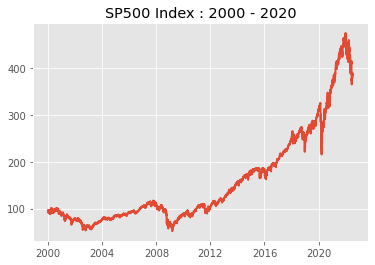

In [70]:
# Slice the DataFrame to get values from 2000
spx = spx['2000':]

# Visualize the plot to verify the data
plt.plot(spx.index, spx['Adj Close'])
plt.title('SP500 Index : 2000 - 2020');

In [71]:
# Calculate returns and add it to existing DataFrame as a column
spx['Return'] = spx['Adj Close'].pct_change().fillna(0)

# Get first 5 rows
spx['Return'].head()

Date
2000-01-03    0.000000
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016072
2000-01-07    0.058076
Name: Return, dtype: float64

In [72]:
# Calculate mean and sigma
mu = np.mean(spx['Return'])
sigma = np.std(spx['Return'])

print(f'Mean {mu:.6f}, Sigma {sigma:.6f}')

Mean 0.000322, Sigma 0.012453


In [73]:
# Calculate the scaled return
spx['Scaled_Return'] = spx['Return'].apply(lambda x: (x - mu)/sigma)

# Check the output
spx.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,96.139771,8164300,0.000000,-0.025890
2000-01-04,143.53125,144.06250,139.640625,139.7500,92.380173,8089800,-0.039106,-3.166184
2000-01-05,139.93750,141.53125,137.250000,140.0000,92.545418,12177900,0.001789,0.117752
2000-01-06,139.62500,141.50000,137.750000,137.7500,91.058060,6227200,-0.016072,-1.316493
2000-01-07,140.31250,145.75000,140.062500,145.7500,96.346367,8066500,0.058076,4.637807


In [74]:
# Calculate minimum and maximum bin range
sr_min = np.min(spx['Scaled_Return'])
sr_max = np.max(spx['Scaled_Return'])

print(f'Minimum {sr_min:.6f}, Maximum {sr_max:.6f}')

Minimum -8.812950, Maximum 11.633901


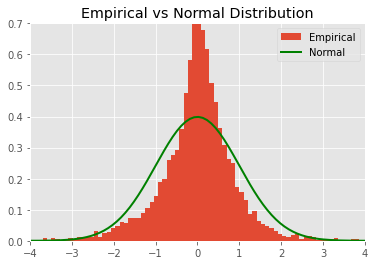

In [75]:
# Define bins
x = np.linspace(sr_min, sr_max, 200)

# Calculate normal probability density function
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)) # can also use norm.pdf(x,0,1)

# Plot histogram of scaled returns
plt.hist(spx['Scaled_Return'], bins=200, density=True, label = 'Empirical', alpha=1)

# Plot norm pdf
plt.plot(x, y, color = 'green', label = 'Normal', alpha=1)

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.7)

# Set title
plt.title('Empirical vs Normal Distribution')

# Set legends
plt.legend()